In [65]:
import matplotlib.pyplot as plt

In [66]:
class KalmanFilter:
    def __init__(
        self,
        estimate: float,
        estimate_variance: float,
    ) -> None:
        self.__init_process(estimate, estimate_variance)

    def __init_process(
        self,
        estimate: float,
        estimate_variance: float,
    ):
        self.estimate_height: float = estimate
        self.estimate_covariance: float = estimate_variance
        self.predicated_height: float = self.estimate_height
        self.predicated_convariance: float = self.estimate_covariance
        self.kalman_gain: float = 0

    def update(self, measurement, measurement_variance):
        self.kalman_gain = self.__kalman_gain_update(
            self.predicated_convariance, measurement_variance
        )

        self.estimate_covariance = self.__covariance_update(
            self.predicated_convariance, self.kalman_gain
        )

        self.estimate_height = self.__state_update(
            self.predicated_height, measurement, self.kalman_gain
        )

        self.predicated_convariance = self.__covariance_extrapolation(
            self.estimate_covariance
        )

        self.predicated_height = self.__state_extrapolation(self.estimate_height)

        return self.estimate_height, self.estimate_covariance, self.predicated_height, self.predicated_convariance, self.kalman_gain

    def __state_update(self, predicated: float, measurement: float, gain: float):
        return predicated + gain * (measurement - predicated)

    def __covariance_update(self, predicated: float, gain: float):
        return (1 - gain) * predicated

    def __kalman_gain_update(self, predicated_variance: float, measuremend_covariace: float):
        return predicated_variance / (predicated_variance + measuremend_covariace)

    def __state_extrapolation(self, estimate: float):
        return estimate

    def __covariance_extrapolation(self, estimate_covariance: float):
        return estimate_covariance

In [67]:
data = [49.03, 48.44, 55.21, 49.98, 50.6, 52.61, 45.87, 42.64, 48.26, 55.84]

kal_filter = KalmanFilter(60, 225)

result: list = []
for i in data:
    result.append(kal_filter.update(i, 25))

In [68]:
time = [x for x in range(10)]

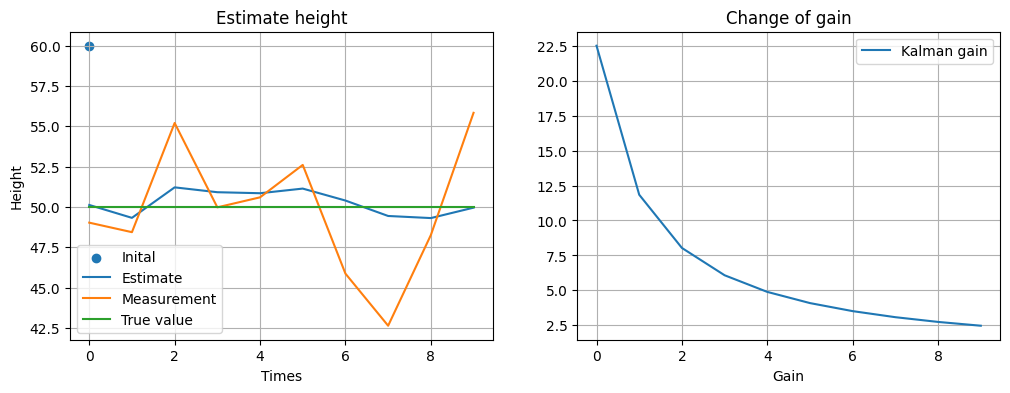

In [69]:
fig = plt.figure()
fig.set_size_inches(12, 4)

ax1 = fig.add_subplot(121)

ax1.scatter(0, 60, label = "Inital")

ax1.plot(time, [item[0] for item in result], label = "Estimate")
ax1.plot(time, data, label = "Measurement")
ax1.plot(time, [50 for x in range(10)], label = "True value")

ax1.set_title("Estimate height")
ax1.set_xlabel("Times")
ax1.set_ylabel("Height")

ax1.legend()
ax1.grid()

ax3 = fig.add_subplot(122)

ax3.plot(time, [item[3] for item in result], label = "Kalman gain")

ax3.set_title("Change of gain")
ax3.set_xlabel("Times")
ax3.set_xlabel("Gain")

ax3.legend()
ax3.grid()

plt.show()

In [70]:
import random
data_size = 100

data_random = [50 + random.uniform(-20, 20) for x in range(data_size)]

result_random = []
rand_times = [x for x in range(data_size)]

rand_filter = KalmanFilter(60, 225)

for i in data_random:
    result_random.append(rand_filter.update(i, 25))

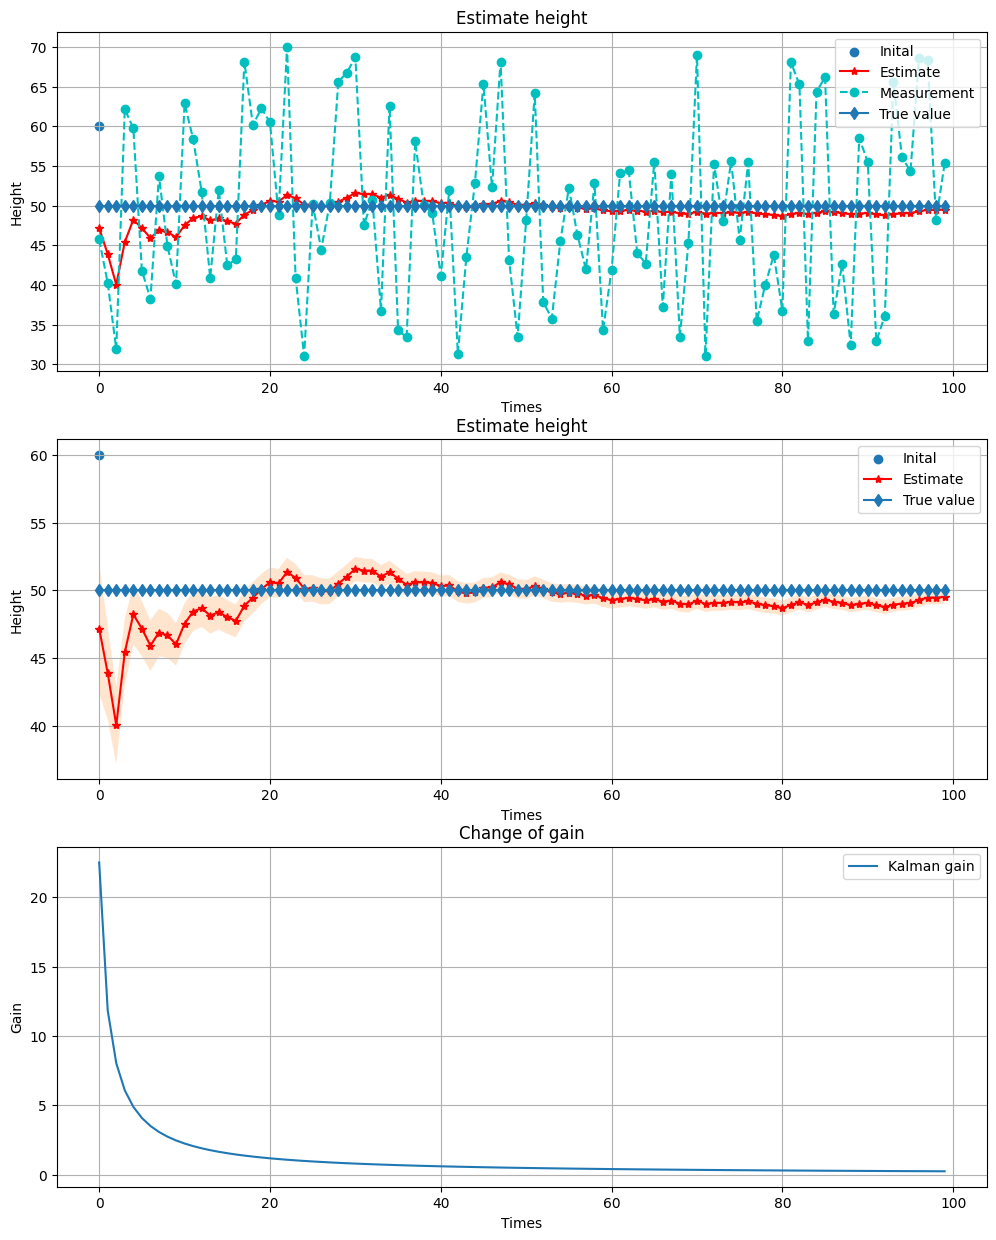

In [90]:
fig = plt.figure()
fig.set_size_inches(12, 15)

ax1 = fig.add_subplot(311)

ax1.scatter(0, 60, label="Inital")

ax1.plot(rand_times, [item[0] for item in result_random], "r-*", label="Estimate")
ax1.plot(rand_times, data_random, "c--o", label="Measurement")
ax1.plot(rand_times, [50 for x in range(data_size)], "-d", label="True value")

ax1.set_title("Estimate height")
ax1.set_xlabel("Times")
ax1.set_ylabel("Height")

ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(312)

ax2.scatter(0, 60, label="Inital")

ax2.plot(rand_times, [item[0] for item in result_random], "r-*", label="Estimate")
ax2.fill_between(
    rand_times,
    [item[0] + (item[1] ** 0.5) for item in result_random],
    [item[0] - (item[1] ** 0.5) for item in result_random],
    alpha = 0.2
)
ax2.plot(rand_times, [50 for x in range(data_size)], "-d", label="True value")

ax2.set_title("Estimate height")
ax2.set_xlabel("Times")
ax2.set_ylabel("Height")

ax2.legend()
ax2.grid()

ax3 = fig.add_subplot(313)

ax3.plot(rand_times, [item[3] for item in result_random], label="Kalman gain")

ax3.set_title("Change of gain")
ax3.set_xlabel("Times")
ax3.set_ylabel("Gain")

ax3.legend()
ax3.grid()

plt.show()